In [59]:
import numpy as np
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

Subir y mostrar dataset

In [26]:
df = pd.read_csv("Myocardial infarction complications.csv")
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77,0,0,4,2,1,?,2,0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70,0,0,6,2,1,?,2,0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55,1,3,6,2,2,?,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79,0,2,2,2,1,?,2,0,...,0,0,0,1,0,0,0,0,0,1


Se elimina la variable ID, se remmplazan los datos vacíos por NaN y calcula la cantidad de datos faltantes del dataset por columna.

In [27]:
df = df.drop(['ID'], axis=1)
df.replace('?', np.nan, inplace=True)
def total_null(df):
    tot = []
    for val in df.isnull().sum():
        tot.append(val)
        cantidad_nan_columna = { k : v for k,v in zip(df.columns, tot)}

    return cantidad_nan_columna
cantidad_nan_columna =  total_null(df)
print(cantidad_nan_columna)

{'AGE': 8, 'SEX': 0, 'INF_ANAM': 4, 'STENOK_AN': 106, 'FK_STENOK': 73, 'IBS_POST': 51, 'IBS_NASL': 1628, 'GB': 9, 'SIM_GIPERT': 8, 'DLIT_AG': 248, 'ZSN_A': 54, 'nr11': 21, 'nr01': 21, 'nr02': 21, 'nr03': 21, 'nr04': 21, 'nr07': 21, 'nr08': 21, 'np01': 18, 'np04': 18, 'np05': 18, 'np07': 18, 'np08': 18, 'np09': 18, 'np10': 18, 'endocr_01': 11, 'endocr_02': 10, 'endocr_03': 10, 'zab_leg_01': 7, 'zab_leg_02': 7, 'zab_leg_03': 7, 'zab_leg_04': 7, 'zab_leg_06': 7, 'S_AD_KBRIG': 1076, 'D_AD_KBRIG': 1076, 'S_AD_ORIT': 267, 'D_AD_ORIT': 267, 'O_L_POST': 12, 'K_SH_POST': 15, 'MP_TP_POST': 14, 'SVT_POST': 12, 'GT_POST': 12, 'FIB_G_POST': 12, 'ant_im': 83, 'lat_im': 80, 'inf_im': 80, 'post_im': 72, 'IM_PG_P': 1, 'ritm_ecg_p_01': 152, 'ritm_ecg_p_02': 152, 'ritm_ecg_p_04': 152, 'ritm_ecg_p_06': 152, 'ritm_ecg_p_07': 152, 'ritm_ecg_p_08': 152, 'n_r_ecg_p_01': 115, 'n_r_ecg_p_02': 115, 'n_r_ecg_p_03': 115, 'n_r_ecg_p_04': 115, 'n_r_ecg_p_05': 115, 'n_r_ecg_p_06': 115, 'n_r_ecg_p_08': 115, 'n_r_ecg_p

Se calcula la cantidad total de datos faltantes y la cantidad de datos mímina que debería tener cada columna

In [28]:
cantidad_total_faltantes = 0
for val in cantidad_nan_columna.values():
    cantidad_total_faltantes = cantidad_total_faltantes + val
porcente_max = 1700*.3


print(f" cantidad total de datos faltantes: {cantidad_total_faltantes} cantidad maxima de perdidad por columna: {porcente_max}")

 cantidad total de datos faltantes: 15974 cantidad maxima de perdidad por columna: 510.0


Se crea una lista con las columnas a eliminar que no cumplen con la cantidad de datos por columna, luego se muestra graficamente la cantidad de datos por columna.

['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NA_KB', 'NOT_NA_KB', 'LID_KB']


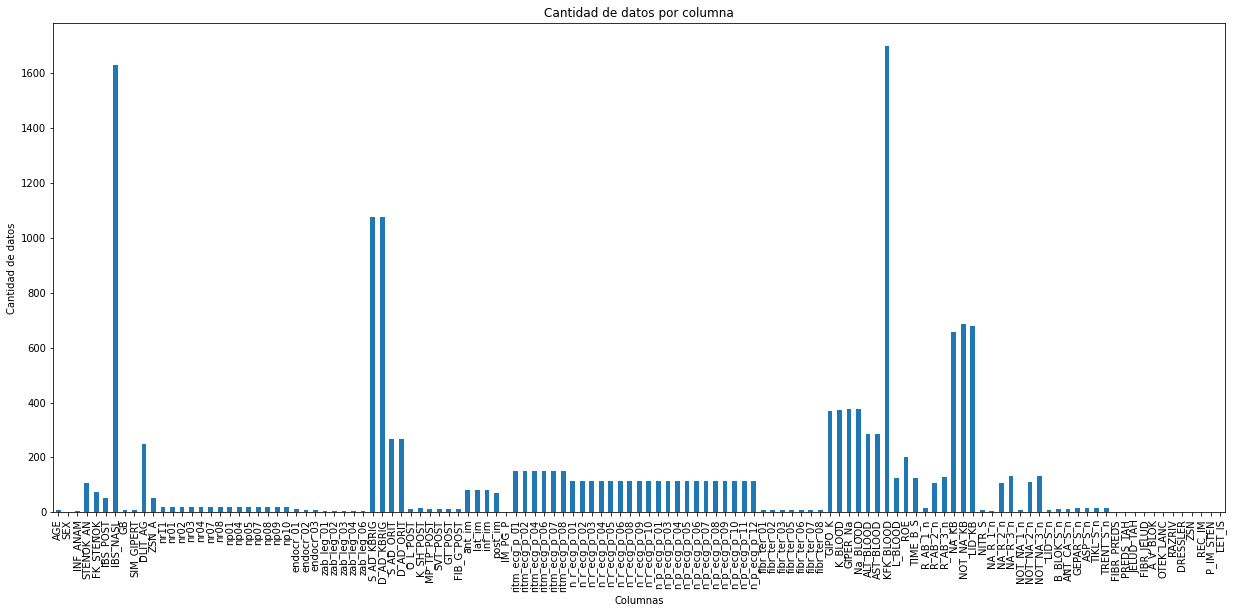

In [29]:
columnas_a_eliminar = [col for col in  cantidad_nan_columna if  cantidad_nan_columna.get(col) >= porcente_max]
print(columnas_a_eliminar)
cantidad_nan = pd.DataFrame.from_dict(cantidad_nan_columna, orient='index', columns=['count'])

# Graficamos el DataFrame
cantidad_nan.plot(kind='bar', figsize=(21, 9), legend=None)
plt.title('Cantidad de datos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de datos')
plt.show()

Se eliminan las columnas y se eliminan las filas y se completan los datos con la moda y la mediana

In [30]:
df = df.drop(columns = columnas_a_eliminar)
def getDataSet(data_set,n):
    data_set=data_set.dropna(thresh=df.shape[1]-n)
    data_set = data_set.fillna(data_set.median(numeric_only=True)) 
    categorical_cols = data_set.select_dtypes(include='object').columns.tolist()
    for col in categorical_cols:
        data_set[col].fillna(data_set[col].mode()[0], inplace=True)
    return data_set

df_29 =getDataSet(df,29)
df_35 =getDataSet(df,35)
df_29

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,77,0,0,0,0,0,2,0,7,0,...,0,0,0,0,1,0,0,0,0,3
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
df_35

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1697,55,1,3,6,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df_29.info()
print('\n------------\n')
df_35.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB

------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB


Se valida que ya no hay datos nulos 

In [34]:
print(total_null(df_29))
print('------------')
print(total_null(df_35))

{'AGE': 0, 'SEX': 0, 'INF_ANAM': 0, 'STENOK_AN': 0, 'FK_STENOK': 0, 'IBS_POST': 0, 'GB': 0, 'SIM_GIPERT': 0, 'DLIT_AG': 0, 'ZSN_A': 0, 'nr11': 0, 'nr01': 0, 'nr02': 0, 'nr03': 0, 'nr04': 0, 'nr07': 0, 'nr08': 0, 'np01': 0, 'np04': 0, 'np05': 0, 'np07': 0, 'np08': 0, 'np09': 0, 'np10': 0, 'endocr_01': 0, 'endocr_02': 0, 'endocr_03': 0, 'zab_leg_01': 0, 'zab_leg_02': 0, 'zab_leg_03': 0, 'zab_leg_04': 0, 'zab_leg_06': 0, 'S_AD_ORIT': 0, 'D_AD_ORIT': 0, 'O_L_POST': 0, 'K_SH_POST': 0, 'MP_TP_POST': 0, 'SVT_POST': 0, 'GT_POST': 0, 'FIB_G_POST': 0, 'ant_im': 0, 'lat_im': 0, 'inf_im': 0, 'post_im': 0, 'IM_PG_P': 0, 'ritm_ecg_p_01': 0, 'ritm_ecg_p_02': 0, 'ritm_ecg_p_04': 0, 'ritm_ecg_p_06': 0, 'ritm_ecg_p_07': 0, 'ritm_ecg_p_08': 0, 'n_r_ecg_p_01': 0, 'n_r_ecg_p_02': 0, 'n_r_ecg_p_03': 0, 'n_r_ecg_p_04': 0, 'n_r_ecg_p_05': 0, 'n_r_ecg_p_06': 0, 'n_r_ecg_p_08': 0, 'n_r_ecg_p_09': 0, 'n_r_ecg_p_10': 0, 'n_p_ecg_p_01': 0, 'n_p_ecg_p_03': 0, 'n_p_ecg_p_04': 0, 'n_p_ecg_p_05': 0, 'n_p_ecg_p_06': 0,

Se calcula la matriz de correlación de la columna ZSN con respecto a las demás

Text(0.5, 1.0, 'Matriz de correlación de ZSN con otras\xa0variables')

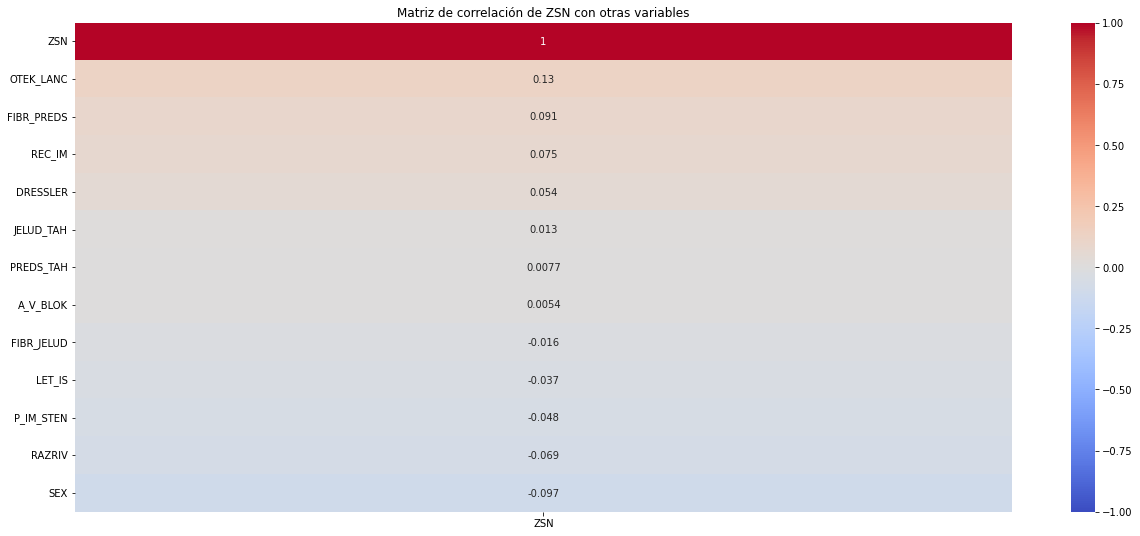

In [40]:
# calcular la matriz de correlación
corr_matrix_29 =df_29.corr()
# especificar la variable objetivo
target_variable = 'ZSN'
# crear el mapa de calor
fig, ax = plt.subplots(figsize=(21, 9))
sns.heatmap(corr_matrix_29[[target_variable]].sort_values(by=target_variable, ascending=False),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)
plt.title(f'Matriz de correlación de {target_variable} con otras variables')

Text(0.5, 1.0, 'Matriz de correlación de ZSN con otras\xa0variables')

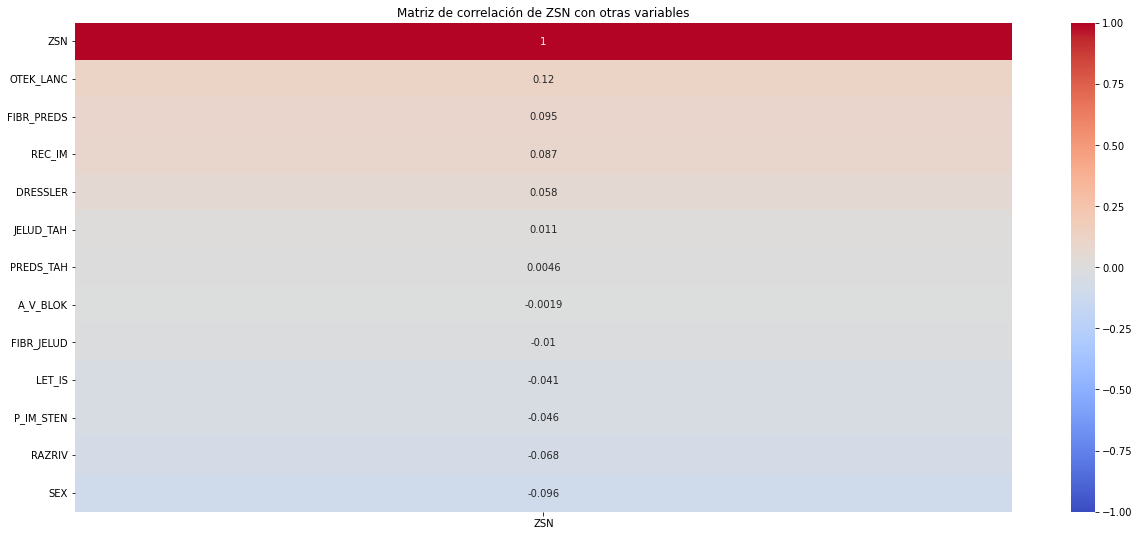

In [41]:
# calcular la matriz de correlación
corr_matrix_35 =df_35.corr()
# especificar la variable objetivo
target_variable = 'ZSN'
# crear el mapa de calor
fig, ax = plt.subplots(figsize=(21, 9))
sns.heatmap(corr_matrix_35[[target_variable]].sort_values(by=target_variable, ascending=False),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)
plt.title(f'Matriz de correlación de {target_variable} con otras variables')

Obtenemos X y Y para utilizar datos de entrenamiento y datos de prueba y luego se parte el dataset con estos datos.

In [43]:
random_dataframe = df_29.sample(frac = 1)
x_29 = random_dataframe.drop(["ZSN"],axis=1)
y_29 = random_dataframe.ZSN
XTrain_29,XTest_29,yTrain_29,yTest_29 = train_test_split(x_29, y_29,test_size=0.25)

In [44]:
random_dataframe = df_35.sample(frac = 1)
x_35 = random_dataframe.drop(["ZSN"],axis=1)
y_35 = random_dataframe.ZSN
XTrain_35,XTest_35,yTrain_35,yTest_35 = train_test_split(x_35, y_35,test_size=0.25)

Se crea el modelo KNN

In [51]:
modeloKNN_29 = KNeighborsClassifier(n_neighbors=6)
modeloKNN_29.fit(XTrain_29,yTrain_29)
yPredictKnn_29 = modeloKNN_29.predict(XTest_29)
modeloKNN_35 = KNeighborsClassifier(n_neighbors=6)
modeloKNN_35.fit(XTrain_35,yTrain_35)
yPredictKnn_35 = modeloKNN_35.predict(XTest_35)

print("Las predicciones son para 29 ")
print(yPredictKnn_29)
print("Se esperaba ")
print(yTest_29)
print("Accuracy=",metrics.accuracy_score(yTest_29,yPredictKnn_29))
print("Las predicciones son para 35 ")
print(yPredictKnn_35)
print("Se esperaba ")
print(yTest_35)
print("Accuracy=",metrics.accuracy_score(yTest_35,yPredictKnn_35))

Las predicciones son para 29 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Se esperaba 
649     0
779     0
860     1
170     0
1441    0
       ..
456     0
1366    0
371     0
1341    0
752     0
Name: ZS

Predicciones

In [52]:
print("Las predicciones son para 35 ")
print(yPredictKnn_35)
print("Se esperaba ")
print(yTest_35)
print("Accuracy=",metrics.accuracy_score(yTest_35,yPredictKnn_35))

Las predicciones son para 35 
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Se esperaba 
182     0
560     0
1573    0
1046    0
532     1
       ..
265     0
404     0
186     0
340     

Matrices de confusión

Matriz de confusión KNN29
[[319   9]
 [ 80   5]]


<AxesSubplot:>

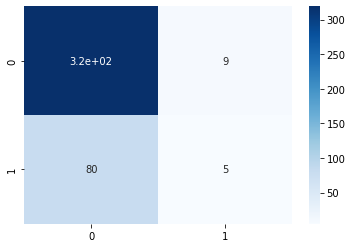

In [56]:
print("Matriz de confusión KNN29")
matriz_29=confusion_matrix(yTest_29,yPredictKnn_29)
print(matriz_29)
sns.heatmap(matriz_29,annot=True,cmap="Blues")


Matriz de confusión KNN35
[[320   7]
 [ 92   4]]


<AxesSubplot:>

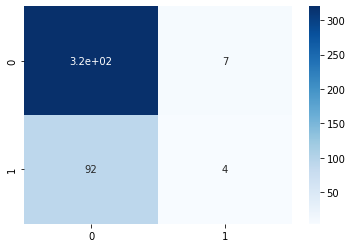

In [57]:
print("Matriz de confusión KNN35")
matriz_35=confusion_matrix(yTest_35,yPredictKnn_35)
print(matriz_35)
sns.heatmap(matriz_35,annot=True,cmap="Blues")

Métricas

In [61]:
model_scoreKNN_29 = cross_val_score(modeloKNN_29,XTest_29,yTest_29,scoring="accuracy",cv = 4).mean()
print("accuracy validación cruzada:", model_scoreKNN_29)
print("Metrics for KNN29")
print("Accuracy: ",metrics.accuracy_score(yTest_29,yPredictKnn_29))
print("F1Score: ",metrics.f1_score(yTest_29,yPredictKnn_29))
print("Recall: ",metrics.recall_score(yTest_29,yPredictKnn_29))
print("Precision: ",metrics.precision_score(yTest_29,yPredictKnn_29))
print("\n--------------------------------------\n")
model_scoreKNN_35 = cross_val_score(modeloKNN_35,XTest_35,yTest_35,scoring="accuracy",cv = 4).mean()
print("accuracy validación cruzada:", model_scoreKNN_35)
print("Metrics for KNN35")
print("Accuracy: ",metrics.accuracy_score(yTest_35,yPredictKnn_35))
print("F1Score: ",metrics.f1_score(yTest_35,yPredictKnn_35))
print("Recall: ",metrics.recall_score(yTest_35,yPredictKnn_35))
print("Precision: ",metrics.precision_score(yTest_35,yPredictKnn_35))


accuracy validación cruzada: 0.7941794249439881
Metrics for KNN29
Accuracy:  0.784503631961259
F1Score:  0.10101010101010101
Recall:  0.058823529411764705
Precision:  0.35714285714285715

--------------------------------------

accuracy validación cruzada: 0.7612309074573225
Metrics for KNN35
Accuracy:  0.7659574468085106
F1Score:  0.07476635514018691
Recall:  0.041666666666666664
Precision:  0.36363636363636365


In [63]:
precision_recall_fscore_support(yTest_29,yPredictKnn_29,average=None)
etiquetas=["NO ZSN","ZSN"]
print(classification_report(yTest_29,yPredictKnn_29,target_names=etiquetas))
print("Accuracy=",modeloKNN_29.score(XTest_29,yTest_29))
print("\n--------------------------------------\n")
precision_recall_fscore_support(yTest_35,yPredictKnn_35,average=None)
etiquetas=["NO ZSN","ZSN"]
print(classification_report(yTest_35,yPredictKnn_35,target_names=etiquetas))
print("Accuracy=",modeloKNN_35.score(XTest_35,yTest_35))

              precision    recall  f1-score   support

      NO ZSN       0.80      0.97      0.88       328
         ZSN       0.36      0.06      0.10        85

    accuracy                           0.78       413
   macro avg       0.58      0.52      0.49       413
weighted avg       0.71      0.78      0.72       413

Accuracy= 0.784503631961259

--------------------------------------

              precision    recall  f1-score   support

      NO ZSN       0.78      0.98      0.87       327
         ZSN       0.36      0.04      0.07        96

    accuracy                           0.77       423
   macro avg       0.57      0.51      0.47       423
weighted avg       0.68      0.77      0.69       423

Accuracy= 0.7659574468085106


Prueba con los vecinos cercanos por los diferentes caminos

In [65]:
distancias=["","manhattan","euclidean","minkowski"]
for k in [1,5,7,33,55,77]:
  for a in range(1,len(distancias)):
    modelo=KNeighborsClassifier(n_neighbors=k,p=a)
    modelo.fit(XTrain_29,yTrain_29)
    yPredict_29=modelo.predict(XTest_29)
    print("Experimento k=",k," distancia =",distancias[a]," Accuracy=",metrics.accuracy_score(yTest_29,yPredict_29))
  print("---------------------------------------")

Experimento k= 1  distancia = manhattan  Accuracy= 0.6731234866828087
Experimento k= 1  distancia = euclidean  Accuracy= 0.6634382566585957
Experimento k= 1  distancia = minkowski  Accuracy= 0.648910411622276
---------------------------------------
Experimento k= 5  distancia = manhattan  Accuracy= 0.774818401937046
Experimento k= 5  distancia = euclidean  Accuracy= 0.7360774818401937
Experimento k= 5  distancia = minkowski  Accuracy= 0.7409200968523002
---------------------------------------
Experimento k= 7  distancia = manhattan  Accuracy= 0.7723970944309927
Experimento k= 7  distancia = euclidean  Accuracy= 0.7699757869249395
Experimento k= 7  distancia = minkowski  Accuracy= 0.7554479418886199
---------------------------------------
Experimento k= 33  distancia = manhattan  Accuracy= 0.7941888619854721
Experimento k= 33  distancia = euclidean  Accuracy= 0.7917675544794189
Experimento k= 33  distancia = minkowski  Accuracy= 0.7917675544794189
---------------------------------------

In [66]:
distancias=["","manhattan","euclidean","minkowski"]
for k in [1,5,7,33,55,77]:
  for a in range(1,len(distancias)):
    modelo=KNeighborsClassifier(n_neighbors=k,p=a)
    modelo.fit(XTrain_35,yTrain_35)
    yPredict_35=modelo.predict(XTest_35)
    print("Experimento k=",k," distancia =",distancias[a]," Accuracy=",metrics.accuracy_score(yTest_35,yPredict_35))
  print("---------------------------------------")

Experimento k= 1  distancia = manhattan  Accuracy= 0.6666666666666666
Experimento k= 1  distancia = euclidean  Accuracy= 0.6501182033096927
Experimento k= 1  distancia = minkowski  Accuracy= 0.6548463356973995
---------------------------------------
Experimento k= 5  distancia = manhattan  Accuracy= 0.7399527186761229
Experimento k= 5  distancia = euclidean  Accuracy= 0.735224586288416
Experimento k= 5  distancia = minkowski  Accuracy= 0.7257683215130024
---------------------------------------
Experimento k= 7  distancia = manhattan  Accuracy= 0.7659574468085106
Experimento k= 7  distancia = euclidean  Accuracy= 0.75177304964539
Experimento k= 7  distancia = minkowski  Accuracy= 0.7541371158392435
---------------------------------------
Experimento k= 33  distancia = manhattan  Accuracy= 0.7706855791962175
Experimento k= 33  distancia = euclidean  Accuracy= 0.7730496453900709
Experimento k= 33  distancia = minkowski  Accuracy= 0.7730496453900709
---------------------------------------
